In [9]:
#Install the pip packages in your current Jupyter Kernel
#In case you don't have the packages installed, uncoment the following lines and run them :D

import sys
# !{sys.executable} -m pip install numpy
# !{sys.executable} -m pip install pandas
# !{sys.executable} -m pip install matplotlib
# !{sys.executable} -m pip install sklearn
# !{sys.executable} -m pip install seaborn

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: /Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip
Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: /Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip
Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: /Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip
Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: /Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip
Defaulting to us

In [10]:
#We're making the basic imports 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

In [11]:
# Read the housing data from a CSV file named 'housing.csv'
# Select specific columns including 'longitude', 'latitude', and 'median_house_value'
data = pd.read_csv('housing.csv', usecols = ['longitude', 'latitude', 'median_house_value'])

# Drop any rows that have missing values (NaN) from the dataset
data = data.dropna()

<AxesSubplot: xlabel='longitude', ylabel='latitude'>

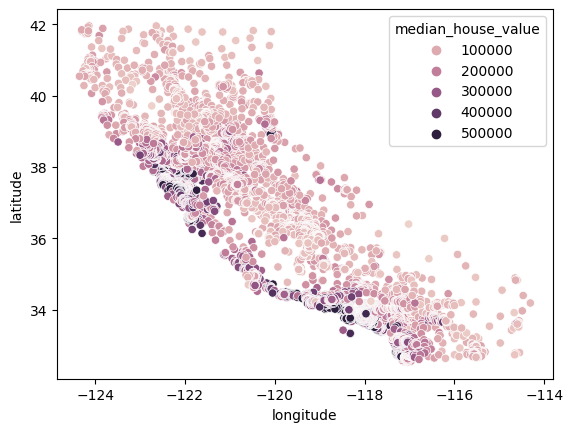

In [12]:
# Import the seaborn library for data visualization
import seaborn as sns

# Create a scatter plot using seaborn's scatterplot function
# Set the data source as 'data' DataFrame
# Specify 'longitude' as the x-axis, 'latitude' as the y-axis, and 'median_house_value' as the hue
sns.scatterplot(data = data, x = 'longitude', y = 'latitude', hue = 'median_house_value')

In [13]:
# Create an instance of StandardScaler for feature scaling
scaler = StandardScaler()

# Apply the StandardScaler to the DataFrame
# The 'fit_transform' method scales and standardizes the data
data_scaled = scaler.fit_transform(data)

/Users/tmac/Library/Python/3.8/lib/python/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/tmac/Library/Python/3.8/lib/python/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/tmac/Library/Python/3.8/lib/python/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/tmac/Library/Python/3.8/lib/python/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Use

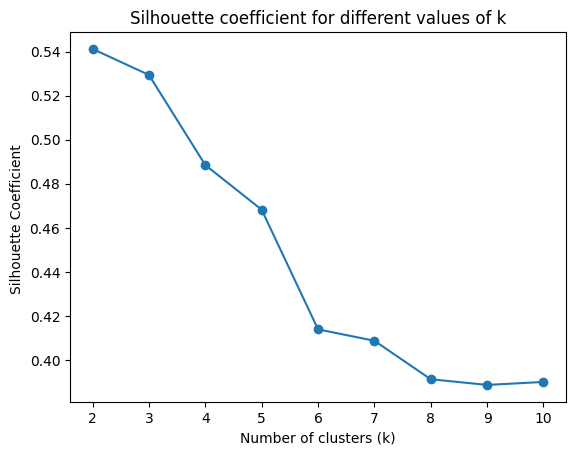

In [14]:
# Calculate silhouette scores for different values of k (number of clusters)
silhouette_scores = []

# Iterate over the range of k values from 2 to 10
for k in range(2, 11):
    # Create an instance of KMeans with k clusters
    kmeans = KMeans(n_clusters=k)
    # Fit the scaled data to the KMeans model
    kmeans.fit(data_scaled)
    # Calculate the silhouette score for the clustered data
    score = silhouette_score(data_scaled, kmeans.labels_)
    # Append the score to the silhouette_scores list
    silhouette_scores.append(score)

# Plot the silhouette scores for different values of k
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Coefficient ')
plt.title('Silhouette coefficient for different values of k')
plt.show()


In [15]:
# Set the number of clusters (k) to 2
k = 2  

# Create an instance of KMeans with k clusters
# Use 'k-means++' initialization and set a random state for reproducibility
kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)

# Fit the scaled data to the KMeans model
kmeans.fit(data_scaled)

/Users/tmac/Library/Python/3.8/lib/python/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=2, random_state=42)

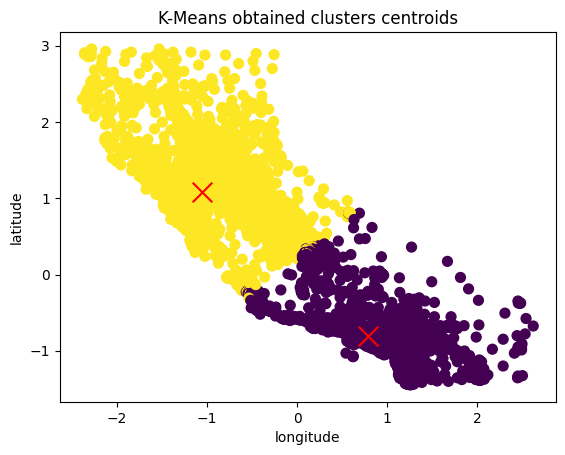

In [16]:
# Obtain clusters and centroids labels
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

# Show the scatter plot
plt.scatter(data_scaled[:, 0], data_scaled[:, 1], c=labels, s=50, cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=200, c='red')
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.title('K-Means obtained clusters centroids')
plt.show()